<h1 style="color:red;">Explanatory models in neonatology (Explain) - Tutorial</h1>

<h5>Introduction</h5>

<p>Critically ill patients are fragile, and their physiology is complex and frequently only partially understood. Diagnostic reasoning, clinical decision making, and communication between members of the healthcare team often take place under time pressure.</p>

<p>Mathematical models of human physiology can support the understanding of a range of conditions, but remain inaccessible to most clinicians due to a lack of mathematical and/or code reading skills. The use of these models in reasoning and decision making is even more challenging than their use in understanding conditions. To overcome these obstacles we propose to use the concept and method of explanatory models, first described in the medical educational context (1). Our initial focus will be on deeper understanding of, and reasoning about, cardiorespiratory (patho)physiology by academic researchers in a neonatal intensive care setting. The explanatory model for this purpose will be referred to as "Explain".  Our ultimate objective remains support of clinical decision making.</p>

<p>This tutorial shows you how to work with the Explain model framework and how to build new patients but also how use the existing models and how to develop your own models with this framework.</p>

<h5>Requirements</h5>

<p>The preferred way to use Explain is by using the webbased version at <a href="https://explain-modeling.com">explain-modeling.com</a>. You can apply for a free account by e-mailing to: <a href="mailto:tim.antonius@radboudumc.nl">tim.antonius@radboudumc.nl</a>. </p>

<p>To use Explain on a local computer additional steps are necessary. For performance reasons we advise to use PyPy version 3.10 <a href="https://www.pypy.org/">(pypy.org) </a>which is a fast, compliant alternative implementation of the Python language but Explain can be run with the normal CPython interpreter from version 3.9 and higher <a href="https://www.python.org/downloads/">(www.python.org)</a>. Explain uses the jupyter, ipykernel, ipympl, matplotlib and multitimer packages. So use your package manager to install these packages. PyPy is highly recommended as the computations of the Explain model greatly benefit from PyPy's JIT compiler. VS Code <a href="https://code.visualstudio.com/download">(code.visualstudio.com)</a> is a good and free editor capable of running interactive python notebooks. As the Explain model also uses some C++ modules the setup is not straightforward. <br><br>Detailed instructions on how to setup your workplace for using the local version of Explain in Windows/Linux/OsX are found <a href="documentation/local_setup.txt">here</a>.

<h5>Let's go</h5>
<p>Explain uses interactive python notebooks (Jupyter) containing the python implementation of the Explain model. The purpose of the notebook is to provide a framework for developers to use Explain for research purposes where clinical problems can be modeled and analyzed. It can be used to test a hypothesis, to explain complex physiology or facilitate clinical discussions. It is also possible to add models, to extend the existing models and to build your own set of patients.</p>

<p>The code is partially optimized for speed, is modular in design but is especially made for readability and explanation. The notebook contains the conceptual and mathematical models and provides links to the python code. By following this notebook step-by-step you'll get a better understanding on how the Explain model actually works and how to build your own patients and add your own models.</p>


<h2 style="color:red;">ModelEngine object</h2>

<p>The ModelEngine object is the conductor of the orchestra. It takes care of all setup, running and dataprocessing of the model. After importing the ModelEngine module we have to provide it with a JSON file containing all model parameters. The ModelEngine returns an initialized instance of the ModelEngine. We store this instance in the variable 'model' but this can have any name. Notice the second and third line which are commented out. If you are running your notebook from a different folder then the root folder (for example the notebooks folder) you have to uncomment the second and third line to make sure the notebook can find all dependencies!</p>

<p>Now run the Python code by clicking on the code-block below and press SHIFT-ENTER</p>


In [1]:
# if this notebook is run from a subfolder, we need to change the working directory to the root folder
# import os

# if os.getcwd().split("/")[-1] != "explain-python":
#     os.chdir("..")

# import the model engine
from explain_core.ModelEngine import ModelEngine

# instantiate a model engine instance with the 'tutorial' model parameters file
model = ModelEngine("tutorial.json")

 Model 'normal neonate' loaded and initialized correctly.


<p>If all goes well and the JSON file containing the model parameters is processed correctly, the ModelEngine will let you know that the model loaded and initialized correctly. The model is now ready for use! </p>

<p>All information about the model is now contained in the variable 'model' which is a Python object. This 'model' object has a range of properties and methods but is not designed to interact with directly as it has a lot of 'housekeeping' methods and abstractions. So although the ModelEngine object is the most important object of Explain you will rarely interact with it.</p>


<h2 style="color:red;">BaseInterface object</h2>
<p>To make interacting with the 'model' object more conventient and safe, an interface object can be attached to the 'model' object. There is a general interface object <a href="explain_core/interfaces/BaseInterface.py">(BaseInterface)</a> which can be used but it is also possible to build your own custom interface object (for example <a href="interfaces/NeoInterface.py"> NeoInterface </a>) based on the general interface.</p>

<p>The next code block imports the BaseInterface module and instantiates an interface object called 'io' and takes the ModelEngine object as it's single argument. The object 'io' can have any name you find convenient.</p> 
<p>Please click on the code block and run it by pressing SHIFT-ENTER. Make sure you did run the code block above where the ModelEngine object is build</p>

<p>The 'io' object is now your model interface which provides an easier way to interact with the model. It has a number of methods which we will discuss now.</p>


In [2]:
# import the general mode interface and instantiate it with the current model object
from explain_core.interfaces.BaseInterface import BaseInterface

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
io = BaseInterface(model)

<h5 style="color:dodgerblue;">calculate and fast_forward</h5>
<p>The first and easiest is the <span style="font-family: 'Courier New'">calculate</span> method. This method takes 1 argument called <span style="font-family: 'Courier New'">time_to_calculate</span> which states the number of seconds that will be calculated. A different implementation of the <span style="font-family: 'Courier New'">calculate</span> method is the <span style="font-family: 'Courier New'">fast_foward</span> method which is somewhat faster but does not gather any data. The <span style="font-family: 'Courier New'">fast_forward</span> method also take 1 argument called time_to_calculte.</p>

<p>Execute the next code block with SHIFT-ENTER.</p>


In [3]:
io.calculate(time_to_calculate=10)

 Ready in 1.4 sec. Average model step in 0.0693 ms.


<p> Congratulations. The modeled patient is now 10 seconds older!</p>


<h5 style="color:dodgerblue;">analyze</h5>
<p>Another important method of the BaseInterface is the <span style="font-family: 'Courier New'">analyze</span> method. This method analyzes the requested model variables and returns the result. Before we discuss all the possibilities of this important method let's first do a simple analysis. </p>

<p>Again execute the code block with SHIFT-ENTER (from now on we leave out this instruction and assume you get the idea). </p>


In [4]:
result = io.analyze(
    ["AA.pres", "LV_AA.flow"],
    time_to_calculate=10,
    weight_based=True,
    sampleinterval=0.0005,
    suppress_output=False,
)

AA.pres         : max   72.99852, min   44.65167 mmHg
LV_AA.flow      : net  231.10821, forward  231.10821, backward        0.0 ml/kg/min, stroke volume:     1.8341 ml/kg, 


<p>This is a slightly more involved method which takes a number of required and optional arguments. Let's break this method down. </p>

<p>The first and required argument is a list of model variables which the model will analyze. This pattern returns a lot in Explain and is an important design concept.</p> 
<p>A list is enclosed in brackets [ ] and a model variable is enclosed by " ". Between the " " the model name is stated first and the variable of that model second separated by a dot (dot-notation style). So if you want to analyze the pressure (pres) in the ascending aorta model called AA the list argument becomes <span style="font-family: 'Courier New'">["AA.pres"]</span>. Multiple variables are separated by comma's, p.e. <span style="font-family: 'Courier New'">["AA.pres", "AA.vol", "PA.pres"]</span>. The analyze routine outputs the result but you can also store it in another object (in the example the object is called result). </p>

<p>There are several optional arguments. When an argument is not set the default value is used: 
<li> <span style="font-family: 'Courier New'">time_to_calculate</span> = no of seconds. The default is 10 seconds.</li>
<li> <span style="font-family: 'Courier New'">weight_based</span> = True/False. When True the result are shown relative to the weight when appropriate. The default is False. </li>
<li> <span style="font-family: 'Courier New'">sampleinterval</span> = no of seconds. When a higher resolution analysis is required choose 0.0005 seconds.  The default is 0.005 seconds. </li>
<li> <span style="font-family: 'Courier New'">suppress_output</span> = True/False. Set True when you want to store the result but don't want the printed output. The default is False.  </li>

Another example of the <span style="font-family: 'Courier New'">analyze</span> method of the general model interface. Notice that when you type io. and press the TAB key all methods of the io object will appear.


In [5]:
result = io.analyze(
    ["LV.vol", "AA_COR.flow", "PA.pres"],
    time_to_calculate=30,
    weight_based=False,
    sampleinterval=0.0005,
    suppress_output=False,
)

LV.vol          : max    8.88772, min    2.57155 ml
AA_COR.flow     : net    9.02657, forward    9.02657, backward        0.0 ml/min, stroke volume:    0.06736 ml, 
PA.pres         : max    35.8505, min   15.29125 mmHg


<h5 style="color:dodgerblue;">plot_time_graph</h5>
<p>The next method of the general model interface is the <span style="font-family: 'Courier New'"> plot_time_graph </span>method. This method plots a graph where the change of a model variable or variables in time is plotted.</p>

<p>First let's do a quick demonstration before we dive into the nuts and bolts of this powerful plotter method.</p>


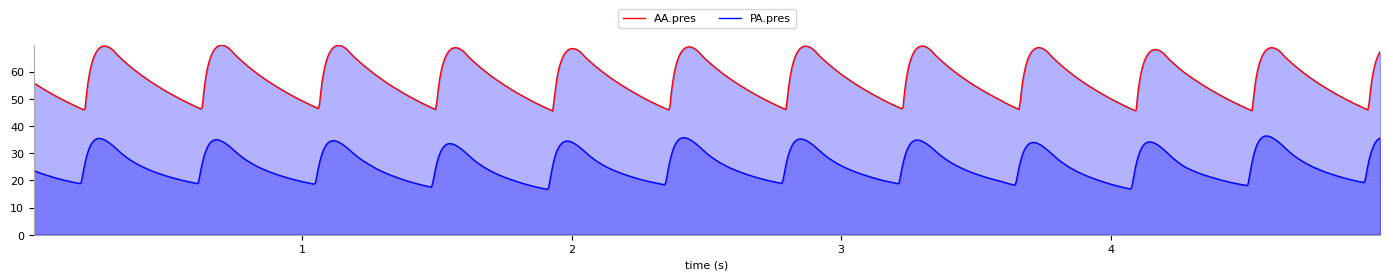

AA.pres         : max   69.64829, min    45.4904 mmHg
PA.pres         : max   36.30413, min   16.67176 mmHg


In [6]:
io.plot_time_graph(["AA.pres", "PA.pres"], time_to_calculate=5.0, analyze=True)

<p>This plotter function has some really nice features which we have to dive into to realize it's full potential. </p>

<p>Just like the 'analyze' method the plot_time_graph method takes 1 required argument which is a list of model variables. See the explanation of the analyze method for a detailed description on how to format such a list. You can have a maximum of 6 model variables in the same plot.</p>

<p> There are several optional arguments. When an argument is not set the default value is used:
<li> <span style="font-family: 'Courier New'">time_to_calculate</span> = no of seconds. The default is 10 seconds.</li>
<li><span style="font-family: 'Courier New'">combined</span> = True/False. This determines whether the plotter plots all model variables of the list in 1 plot or not. The default is True.</li>
<li><span style="font-family: 'Courier New'">sharey</span> = True/False. This determines whether or not all the subplots have the same y-axis scale.The defualt is True. </li></p>
<p>See an example of multiple plots below.</p>


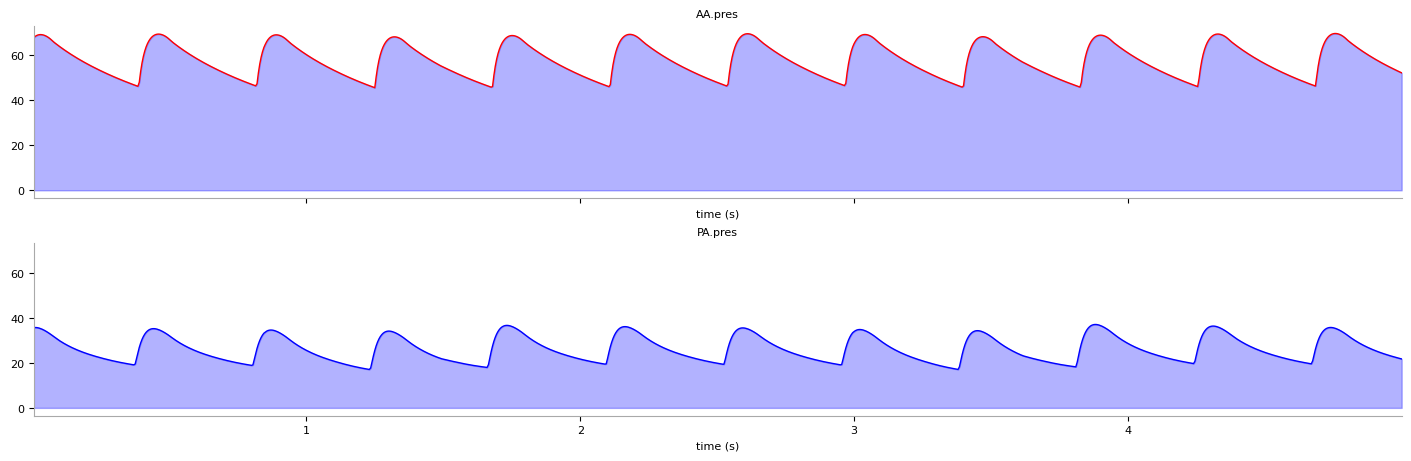

AA.pres         : max   69.69995, min   45.61633 mmHg
PA.pres         : max   37.07313, min   17.07176 mmHg


In [7]:
io.plot_time_graph(
    ["AA.pres", "PA.pres"],
    time_to_calculate=5.0,
    combined=False,
    sharey=True,
    analyze=True,
)

<p>
Other optional arguments of the plotter functions are:

<li><span style="font-family: 'Courier New'">analyze</span> = True/False. When set to True the plotter outputs an analysis of the model variables at the bottom of the graph.
<li><span style="font-family: 'Courier New'">sampleinterval</span> = 0.005. When a higher resolution plot is desired set this value to 0.0005.
<li><span style="font-family: 'Courier New'">fill</span> = True/False. Determines whether the space below the graph is filled. Default is True.
<li><span style="font-family: 'Courier New'">fill_between</span> = True/False. Determines whether the space between the first two model variables is filled. Default is False.
<li><span style="font-family: 'Courier New'">zeroline</span> = True/False. If set to True a dotted line at y=0 will be shown. Default is False
<li><span style="font-family: 'Courier New'">ylabel</span> = textlabel. You can set the argument to a textlabel which will be shown on the y-axis. Default = "".
<li><span style="font-family: 'Courier New'">autoscale</span> = True/False. If set to true the y-axis will autoscale. If False the plot uses the ylowerlim and yupperlim as limits for the y-axis. Default is True.
<li><span style="font-family: 'Courier New'">ylowerlim</span> = number. If autoscale is False then this argument sets the lower limit of the y-axis. Default = 0
<li><span style="font-family: 'Courier New'">yupperlim</span> = number. If autoscale is False then this argument sets the upper limit of the y-axis. Default = 100
</p>

<p>The <span style="font-family: 'Courier New'">plot_time_graph</span> method is a powerful method. Remember, you only have to pass the required arguments which is the list of model variables you want to display. Only set the other optional arguments if you don't want to use the default values. Below is an example where ALL arguments are set.


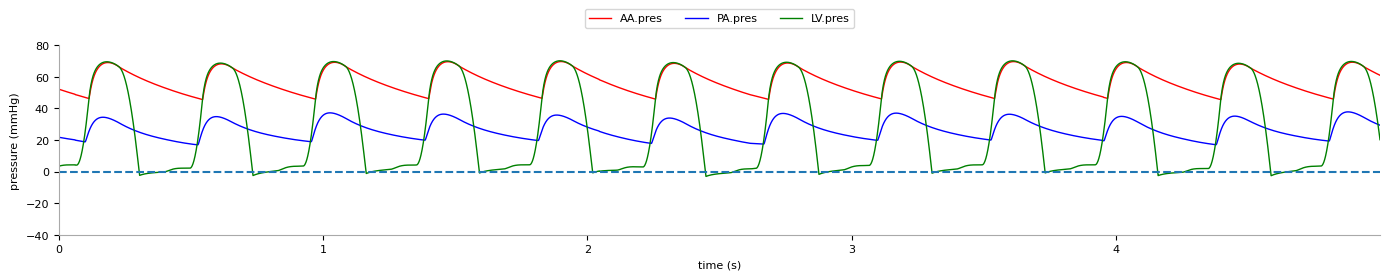

AA.pres         : max    69.6829, min   45.56145 mmHg
PA.pres         : max   37.80987, min     16.874 mmHg
LV.pres         : max    70.1681, min   -3.06732 mmHg


In [8]:
io.plot_time_graph(
    ["AA.pres", "PA.pres", "LV.pres"],
    time_to_calculate=5.0,
    combined=True,
    sharey=True,
    analyze=False,
    fill=False,
    ylabel="pressure (mmHg)",
    autoscale=False,
    ylowerlim=-40,
    yupperlim=80,
    zeroline=True,
    sampleinterval=0.0005,
    analyze=True,
)

<h5 style="color:dodgerblue;">plot_xy_graph</h5>
<p>The other plotter method is the <span style="font-family: 'Courier New'"> plot_xy_graph </span>method. This method plots two model variables against each other. This can be used for pressure-volume loops for example. </p>

<p>
Arguments of this plotter function are:

<li><span style="font-family: 'Courier New'">property_x</span> = model variable. This required argument sets the model variable which is plotted on the x-axis. The format follows the dot-notation scheme as described above. For example <span style="font-family: 'Courier New'">"LV.vol"</span>
<li><span style="font-family: 'Courier New'">property_y</span> = model variable. This required argument sets the model variable which is plotted on the y-axis. The format follows the dot-notation scheme as described above. For example <span style="font-family: 'Courier New'">"LV.pres"</span>
<li> <span style="font-family: 'Courier New'">time_to_calculate</span> = no of seconds. The default is 10 seconds.</li>
<li><span style="font-family: 'Courier New'">sampleinterval</span> = 0.005. When a higher resolution plot is desired set this value to 0.0005.
</p>


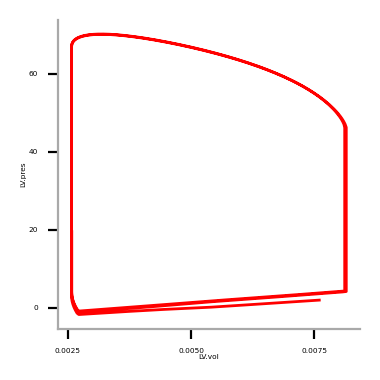

In [9]:
io.plot_xy_graph("LV.vol", "LV.pres", time_to_calculate=1.0, sampleinterval=0.0005)

<h5 style="color:dodgerblue;">get_model_property</h5>

<p>The <span style="font-family: 'Courier New'">get_model_property</span> of the general model interface method returns the value of a model property. It takes 1 argument using the dot-notation as we have seen before. So first de model name, then a . followed by the model property. So the get the baseline elastance of the ascending aorta of the neonatal model the argument would be <span style="font-family: 'Courier New'">"AA.el_base"</span>.</p>


In [10]:
io.get_model_property("AA.el_base")

23000

<h5 style="color:dodgerblue;">set_model_property</h5>

<p>The <span style="font-family: 'Courier New'">set_model_property</span> of the general model interface method sets the value of a model property. As it is often not a good idea to change to value of a model property instantaneously this method has some extra arguments for setting the model property gradually.</p>

<p>Arguments of the set_model_property method.
<li><span style="font-family: 'Courier New'">prop</span> = "". Target model property formatted using the dot-notation -> "MODEL.PROP".  
<li><span style="font-family: 'Courier New'">new_value</span> = value. New value of the model property.

<p>Optional arguments of the set_model_property method.
<li><span style="font-family: 'Courier New'">in_time</span> = no of seconds. In how much time is the model property changed. Default = 5.0
<li><span style="font-family: 'Courier New'">at_time</span> = no of seconds. At what time in the next model run should the propery start to change. Default = 0.0 -> meaning immediately 
</p>
<p> It is important to realize that the changes of the property are applied during the next model run!</p>


In [11]:
io.set_model_property(prop="AA.el_base", new_value=23100, in_time=10.0, at_time=0.0)
io.calculate(20)

 Ready in 1.8 sec. Average model step in 0.0442 ms.


<h5 style="color:dodgerblue;">change_model_property</h5>

<p>The <span style="font-family: 'Courier New'">change_model_property</span> of the general model interface method changes the value of a model property by a certain factor (so relative change). As it is often not a good idea to change to value of a model property instantaneously this method has some extra arguments for changing the model property gradually.</p>

<p>Arguments of the set_model_property method.
<li><span style="font-family: 'Courier New'">prop</span> = "". Target model property formatted using the dot-notation -> "MODEL.PROP".  
<li><span style="font-family: 'Courier New'">prop_change</span> = value. Relative change of the mode property. So 0.4 means the property changes bij factor 0.4 (-60%).

<p>Optional arguments of the set_model_property method.
<li><span style="font-family: 'Courier New'">in_time</span> = no of seconds. In how much time is the model property changed. Default = 5.0
<li><span style="font-family: 'Courier New'">at_time</span> = no of seconds. At what time in the next model run should the propery start to change. Default = 0.0 -> meaning immediately 
</p>
<p> It is important to realize that the changes of the property are applied during the next model run!</p>


In [12]:
io.change_model_property(prop="AA.el_base", prop_change=0.9, in_time=10.0, at_time=0.0)
io.calculate(20)

 Ready in 1.7 sec. Average model step in 0.0425 ms.


<h5 style="color:dodgerblue;">inspect_model</h5>

<p>The <span style="font-family: 'Courier New'">inspect_model</span> of the general model interface method returns all the properties of a model. It takes 1 argument stating the model which you want to inspect enclosed by "".</p>


In [13]:
io.inspect_model("AA")

{'_is_initialized': True,
 '_mmhg_kpa': 1.0,
 '_t': 0.0005,
 'ans_activity_factor': 1.0,
 'description': 'ascending aorta',
 'diastole': 0.0,
 'el_base': 20790.0,
 'el_base_ans_factor': 1.0,
 'el_base_drug_factor': 1.0,
 'el_base_factor': 1.0,
 'el_base_scaling_factor': 1.0,
 'el_k': 0,
 'el_k_factor': 1.0,
 'el_k_scaling_factor': 1.0,
 'fixed_composition': False,
 'is_enabled': True,
 'mean': 0.0,
 'model_type': 'BloodCapacitance',
 'name': 'AA',
 'pres': 66.05768135316812,
 'pres_atm': 0.0,
 'pres_cc': 0.0,
 'pres_ext': -6.988513294948601,
 'pres_in': 73.0422656179485,
 'pres_mus': 0.0,
 'pres_out': -6.984584264780379,
 'pres_tm': 80.02684988272888,
 'stroke_volume': 0.0,
 'systole': 0.0,
 'u_vol': 0.003,
 'u_vol_ans_factor': 1.0,
 'u_vol_factor': 1.0,
 'u_vol_scaling_factor': 1.0,
 'vol': 0.006517180240487501,
 'vol_max': 0.0,
 'vol_min': 0.0,
 'vol_total': 0.009513336489559814}

<h5 style="color:dodgerblue;">save_model_state</h5>

<p>The <span style="font-family: 'Courier New'">save_model_state</span> of the general model interface method saves the current state of the ModelEngine object as a binary file with the .xpl extension. It takes 1 argument stating the filename.</p>


In [14]:
io.save_model_state("model_state")

<h5 style="color:dodgerblue;">load_model_state</h5>

<p>The <span style="font-family: 'Courier New'">load_model_state</span> of the general model interface method loads a binary file with .xpl extension holding a saved ModelEngine state. It takes 1 argument stating the filename.</p>


In [15]:
model.load_model_state("model_state")

<h2 style="color:red;">Developing custom interfaces</h2>

<p> The BaseInterface object exposes some high-level methods which are general and not tuned to a specific implementation of the Explain model. That's why it is almost always benefical to create a custom interface object for 'your' models. Let's first start with an example. In the interfaces folder you can find a file called NeoInterface.py. This is an example of a custom model interface. You can open it by clicking on this <a href="interfaces/NeoInterface.py">link</a> or navigating to the folder.</p>
<p> To use a custom interface model we have to import and instantiate it. The next code-block imports the NeoInterface model interface, instantiates it and assigns it to a Python object called 'neo'. Like before, this can have any name.</p>


In [16]:
# import the custom interface
from interfaces.NeoInterface import NeoInterface

# instantiate the custom interface and pass the current model object as am argument
neo = NeoInterface(model)

<p>The neo object now contains the NeoInterface object and we can use it's functions. A custom interface object inherits all functions from the BaseInterface object so you can use the functions of the BaseInterface inside you custom model interface. Below is an example of a function of the NeoInterface object.</p>


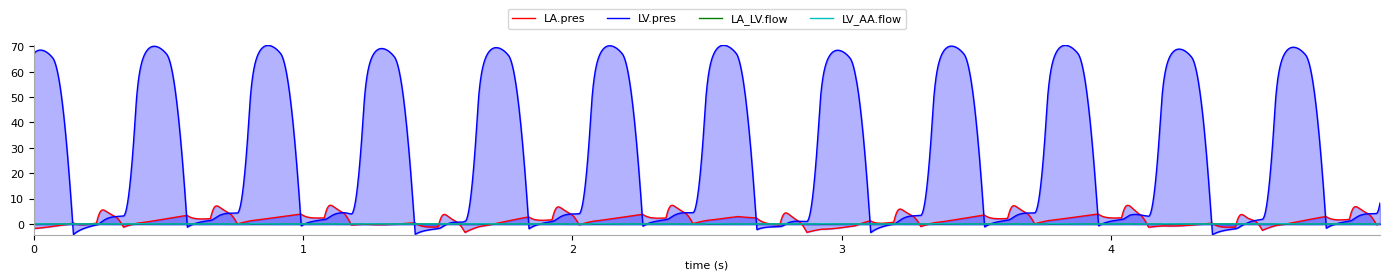

In [17]:
neo.plot_heart_left(time_to_calculate=5)

<p>When we look inside the code of the <a href="interfaces/NeoInterface.py">NeoInterface</a> we can see that the function <span style="font-family: 'Courier New'">plot_heart_left</span> actually uses the <span style="font-family: 'Courier New'">plot_time_graph</span> of the BaseInterface but with preconfigured arguments especially tuned for the normal_neonate model. Examining the NeoInterface custom interface is a great way to start developing your own custom interfaces.</p>


In [18]:
# example code of the plot_heart_pressures_left function in the NeoInterface custom interface module
def plot_heart_pressures_left(
    self,
    time_to_calculate=2,
    combined=True,
    sharey=True,
    autoscale=True,
    ylowerlim=0,
    yupperlim=100,
    fill=True,
    analyze=False,
):
    self.plot_time_graph(
        ["LV.pres", "LA.pres", "AA.pres"],
        time_to_calculate=time_to_calculate,
        autoscale=True,
        combined=combined,
        sharey=sharey,
        sampleinterval=0.0005,
        ylowerlim=ylowerlim,
        yupperlim=yupperlim,
        fill=fill,
        fill_between=False,
        analyze=analyze,
    )

<p>If you want to start a new custom interface, duplicate the <a href="interfaces/CustomInterfaceTemplate.py">CustomInterfaceTemplate.py</a> file in the interfaces folder. Replace the CustomInterfaceTemplate filename with your own and use the same name in the class definition.</p>

<p><span style="font-family: 'Courier New'">class YourInterfaceNameHere(BaseInterface): <br> pass<span></p>

<p>Remove the pass keyword and start programming your own custom interface methods. As the custom interface inherits from the BaseInterface you have access to the functions of the BaseInterface with the <span style="font-family: 'Courier New'">self</span> keyword. So to access the <span style="font-family: 'Courier New'">plot_time_graph</span> of the BaseInterface preceed the call to the function with the self keyword. Examine the <a href="interfaces/NeoInterface.py">NeoInterface.py</a> file to see how this is done.</p>

<p>To use your custom interface import it, instantiate it and assign it to a Python object. Look above where we import the NeoInterface on how to do this. You now have your own custom model interface! </p>


<h2 style="color:red;">Base models</h2>


<h3 style="color:darkblue;">BaseModel object</h3>


<p>Now we know how to load, run and interface with the Explain ModelEngine, it's time to get to know more about how the Explain ModelEngine actually works. We will use the <a href="tutorial.json">tutorial model</a> implementation as an illustration of the inner workings of Explain. At the end of this tutorial you should have a good understanding on how the model works and how you can build your own implementation of the Explain model.</p>

<p>All models in Explain derive from the BaseModel class which is the parent for all models. A class is like a blueprint for an object in Python. So a good place to start is the BaseModel class which is defined in the file <a href="explain_core/base_models//BaseModel.py">BaseModel.py</a> in the explain_core/base_models folder. The BaseModel class exposes a number of methods and properties which are important targets for the ModelEngine.</p>

<h5 style="color:dodgerblue;">Independent properties of the BaseModel object</h5>

<p>Every model inside Explain derives from the BaseModel object and has these properties.</p>
<p>
<li><span style="font-family: 'Courier New'">name</span> = "". Name of the model object. For example "AA".
<li><span style="font-family: 'Courier New'">description</span> = "". Description of the model object. For example "ascending aorta".
<li><span style="font-family: 'Courier New'">model_type</span> = "". Sets the model type. For example "BloodCapacitance".
<li><span style="font-family: 'Courier New'">is_enabled</span> = True/False. Determines whether or not the model is enabled.
</p>

<h5 style="color:dodgerblue;">Methods of the BaseModel object</h5>

<p>Every model inside Explain derives from the BaseModel object and has these methods.</p>
<p>
<li><span style="font-family: 'Courier New'">__init__(dict[str, any])</span>.  This method is called when a model is instantiated by the ModelEngine and takes a dictionary as argument. This dictionary contains all the model parameters as specified in the JSON model configuration file which we will discuss in a few moments. For now it's enough to realize that when instantiating a new model this routine is called and sets the properties of the model.
<li><span style="font-family: 'Courier New'">init_model(ModelEngine: model)</span>.  After instantiating the model, the ModelEngine initializes all models by calling this method on every instantiated model. It takes 1 argument and that is a reference to the ModelEngine itself. As a lot of models need addtional initialization you can override this method as we will see later on.
<li><span style="font-family: 'Courier New'">enable()</span>.  This routine enables the model if not already enabled.
<li><span style="font-family: 'Courier New'">disable()</span>.  This routine disables the model if not already disabled.
<li><span style="font-family: 'Courier New'">step_model()</span> .  This routine is called by the ModelEngine on every model step during a model run. This method calls the actual modeling calculations routine (calc_model) if the model is enabled. It is really uncommon that you have override this method in your model.
<li><span style="font-family: 'Courier New'">calc_model()</span>.  This method is almost always overridden by the model as all model calculations are done in this method.</p>

<h5 style="color:dodgerblue;">Using the BaseModel object</h5>

<p>We can imagine that at this stage the BaseModel concept is still quite an abstract concept for a lot of first-time readers and especially for people not familiar with the concept of object-oriented programming. We will now discuss an example of a model used by Explain in an attempt to make things more clear.</p>

<p>All model parameters are specified in a JSON file which is loaded and processed by the ModelEngine. When we look at the <a href="tutorial.json">tutorial.json</a> file we can find a long list of models in the models list. Please have a look at the <a href="tutorial.json">tutorial.json</a> file and explore the models list. You'll find there for every model at least the BaseModel properties (<span style="font-family: 'Courier New'">name, description, model_type and is_enabled</span>). </p>
<p>Here is an example of a model definition of the aortic valve definition taken from the JSON file. Notice the BaseModel properties and the additional properties (<span style="font-family: 'Courier New'">no_flow, no_back_flow, comp_from, comp_to, r_for, r_back and r_k</span>). These additional properties are required properties of the Resistor model object.</p>

<p style="font-family: 'Courier New'">
"LV_AA": {
      "name": "LV_AA",
      "description": "aortic valve",
      "model_type": "Resistor",
      "is_enabled": true,
      "no_flow": false,
      "no_back_flow": true,
      "comp_from": "LV",
      "comp_to": "AA",
      "r_for": 18,
      "r_back": 18,
      "r_k": 0
    },
    </p>
    
<p>So, the aortic valve with name LV_AA is a Resistor model object. As all model object derive from the BaseModel object the properties of the BaseModel object are also inside this definition.</p>
<p> When the JSON file is read by the ModelEngine the ModelEngine reads all the properties, searches for the Resistor model in the base_models/core_models or models folder, instantiates it with the properties, initializes the model and puts a reference to the initialized model in the model list of the ModelEngine object. When a model run is started the <span style="font-family: 'Courier New'">step_model</span> method for every model is called one by one by the ModelEngine object.</p>
<p>We now know that all models in Explain derive from the BaseModel object and have at least the BaseModel object properties in common. However, we can take the so called 'inheritance' concept a bit further. Have a look at the <a href="explain_core/core_models/BloodCapacitance.py">BloodCapacitance model</a>. Look at the class declaration line inside the Python code you'll find that this model derives from the <a href="explain_core/base_models/Capacitance.py">Capacitance model</a>. The Capacitance model derives from the BaseModel object. This means that the BloodCapacitance model has all BaseModel properties and methods AND all Capacitance properties and methods. Through this inheritance concept we can build different models without having to repeat a lot of Python code. We call the BaseModel the parent of all models and a model which derives from a parent is called a child. So in case of the BloodCapacitance model. The parent is the Capacitance model and the child is the BloodCapacitance. The parent of the Capacitance model is the BaseModel object. </p>

<p>To make things a bit more interesting a child model can overrule a parent property or method. For example, the calc_model() method of the BaseModel object is overruled by almost all children from the BaseModel object because all models have their own implementation of this method. This can be the case for all methods or properties of a parent models. If the child model does not overrule a parent method or property the parent's version of the method or property is used. For programmers this concept of inheritance and polymorphism is a common design paradigm, however for all other users this might be quite challenging. </p>
<p>The Explain model has a number of base and core_models which we will discuss in a separate tutorial. These models are developed by our team and can be used as a parent for your own models. Building your own models is actually quite easy in Explain and one of it's most important and compelling features.</p>


<h3 style="color:darkblue;">Capacitance object</h3>

<p>One of the basic building blocks of the Explain model is the Capacitance object which we will discuss in this section.</p> 
<p>The Capacitance model inherits from the BaseModel and has a set of additional specific properties describing the model. A Capacitance is a volume holding entity with an unstressed volume, an elastance and a non-linear elastance factor determining the pressure inside the capacitance. A Capacitance can hold any volume like blood, gas, fluid etc. The unstressed volume is the volume at which the pressure inside the elastance is zero. The basic formula on how the pressure is calculated is: pressure = (volume - unstressed volume) * elastance. In the real model it is actually a non linear function with additional pressures exerted on it from the outside. See below for the actual calculations done by this model. A capacitance exposes a number of properties as factors which are used to dynamically adjust the capacitance behaviour. For example the el_base_ans_factor is a factor influencing the baseline elastance of the capacity and is used by the autonomic nervous system model. This is a multiplication factor and set to 1.0 as default which results in having no effect. <br><br>The use of factors to adjust the properties of a model is a very common design principle in Explain which allows for applying relative changes to the properties instead of setting the absolute values which can be problematic in dynamic systems.</p>

<h5 style="color:dodgerblue;">Independent properties of a Capacitance</h5>
<li><span style="font-family: 'Courier New'">u_vol = volume in liters. The volume at which the pressure is equal to zero. Default = 0.0</span>
<li><span style="font-family: 'Courier New'">u_vol_factor = unitless. Factor with which the u_vol is mulitplied. Default = 1.0</span>
<li><span style="font-family: 'Courier New'">el_base = elastance in mmHg/l. The elasticity of the structure determining how much pressure is needed to fill the capacitance. Default = 0.0</span>
<li><span style="font-family: 'Courier New'">el_base_factor = unitless. Factor with which the el_base is multiplied. Default = 1.0</span>
<li><span style="font-family: 'Courier New'">el_base_ans_factor = unitless. Factor with which the el_base is multiplied determined by the autonomic nervous system. Default = 1.0</span>
<li><span style="font-family: 'Courier New'">el_base_drug_factor = unitless. Factor with which the el_base is multiplied determined by the drug model. Default = 1.0</span>
<li><span style="font-family: 'Courier New'">el_k = volume in mmHg/l^2. Factor determining the non linear relation between volume and pressure. Default = 0.0</span>
<li><span style="font-family: 'Courier New'">el_k_factor = unitless. Factor with which the el_k is multiplied. Default = 1.0</span>
<li><span style="font-family: 'Courier New'">fixed_composition = True/False. Determines whether this capacitance has a fixed volume and blood/gas composition. Default = False</span>
<li><span style="font-family: 'Courier New'">ans_activity_factor = unitless. Factor which dampens the autonomic nervous system. Default = 1.0</span>
<li><span style="font-family: 'Courier New'">pres_ext = in mmHg. Pressure exerted on the capacitance from the outside. Default = 0.0</span>
<li><span style="font-family: 'Courier New'">pres_mus = in mmHg. Pressure exerted on the capacitance from the outside by muscles. Default = 0.0</span>
<li><span style="font-family: 'Courier New'">pres_cc = in mmHg. Pressure exerted on the capacitance from the outside by chest compressions. Default = 0.0</span>
<li><span style="font-family: 'Courier New'">pres_atm = in mmHg. Pressure exerted on the capacitance from the outside by the atmospheric pressure. Default = 0.0</span><br>

<h5 style="color:dodgerblue;">Dependent properties of a Capacitance</h5>
<li><span style="font-family: 'Courier New'">vol = volume in liters. Current volume of the capacitance</span>
<li><span style="font-family: 'Courier New'">pres = pressure in mmHg. Current pressure of the capacitance</span>
<li><span style="font-family: 'Courier New'">pres_tm = pressure in mmHg. Transmural pressure of the capacitance</span>
<li><span style="font-family: 'Courier New'">pres_in = pressure in mmHg. Internal or recoil pressure of the capacitance</span>
<li><span style="font-family: 'Courier New'">pres_out = pressure in mmHg. Outside pressure of the capacitance</span><br>

<h5 style="color:dodgerblue;">Methods of a Capacitance</h5>
<li><span style="font-family: 'Courier New'">calc_model(). Calculates the current pressure of the capacitance</span>
<li><span style="font-family: 'Courier New'">volume_in(dvol). Adds volume to the capacitance. dvol in liters</span>
<li><span style="font-family: 'Courier New'">volume_out(dvol). Removes volume from the capacitance. dvol in liters</span><br>

<p> The pressure inside a capacitance is determined by the following formulas: </p> 
<p style="font-family: 'Courier New'" >
_el_base = el_base * el_base_factor <br>
_u_vol_base = u_vol * u_vol_factor<br>
el = (_el_base + (el_base_ans_factor * _el_base - _el_base) * ans_activity_factor + (el_base_drug_factor * _el_base - _el_base))<br>
u_vol = (_u_vol_base + (_u_vol_base * u_vol_ans_factor - _u_vol_base) * ans_activity_factor)<br>
pres = el * (vol - u_vol) + (el_k * el_k_factor * (vol - u_vol)^2) + pres_atm + (pres_ext + pres_cc + pres_mus)<br>
pres_tm = el * (vol - u_vol) + (el_k * el_k_factor * (vol - u_vol)^2) + pres_atm - (pres_ext + pres_cc + pres_mus) <br>
pres_in = el * (vol - u_vol) + (el_k * el_k_factor * (vol - u_vol)^2) + pres_atm <br>
pres_out = pres_ext + pres_cc + pres_mus </p>

<h5 style="color:dodgerblue;">Using the Capacitance object</h5>
<p>A capacitance is one the most important building blocks of Explain and is used to model gas and blood holding structures. </p>


<h3 style="color:darkblue;">TimeVaryingElastance object</h3>

<p>The TimeVaryingElastance object is a Capacitance object but can vary it's elastance between two predefined values called <span style="font-family: 'Courier New'">el_min</span> and <span style="font-family: 'Courier New'">el_max</span> using an activation factor called <span style="font-family: 'Courier New'">act_factor</span>. As it derives from the Capacitance class this object has all properties and methods of a Capacitance object. However, the way the pressure inside a TimeVaryingElastance object is calculated differs from the way this is done in a Capacitance object. All other functionality is the same.</p>

<h5 style="color:dodgerblue;">TimeVaryingElastance specific independent properties</h5>
<li><span style="font-family: 'Courier New'">el_min = elastance in mmHg/l. The minimal elasticity of the structure. Default = 0.0</span>
<li><span style="font-family: 'Courier New'">el_max = elastance in mmHg/l. The maximal elasticity of the structure. Default = 0.0</span>
<li><span style="font-family: 'Courier New'">el_k = elastance in mmHg/l. Factor determining the non linear relation between volume and pressure. Default = 0.0</span>
<li><span style="font-family: 'Courier New'">act_factor = unitless. Activation factor of the varying elastance function. Default = 0.0</span>

<h5 style="color:dodgerblue;">TimeVaryingElastance specific methods </h5>
<li><span style="font-family: 'Courier New'">calc_model(). A TimeVaryingElastance overrides the calc_model() method of it's parent(Capacitance). This method calculates the current pressure of the TimeVaryingElastance object.</span>

<p>The pressure inside a TimeVaryingElastance object is calculated using the following formulas: </p>

<p style="font-family: 'Courier New'" >
p_ed = el_min * (vol - u_vol) + el_k * (vol - u_vol)^2 + pres_atm + pres_ext + pres_cc + pres_mus<br>
p_ms = el_max * (vol - u_vol)
pres = (p_ms - p_ed) * act_factor + p_ed<br>
pres_tm = el * (vol - u_vol) + (el_k * el_k_factor * (vol - u_vol)^2) + pres_atm - (pres_ext + pres_cc + pres_mus) <br>
pres_in = el * (vol - u_vol) + (el_k * el_k_factor * (vol - u_vol)^2) + pres_atm <br>
pres_out = pres_ext + pres_cc + pres_mus </p>

<p>All other independent parameters and dependent variables and methods are inherited from the Capacitance class!</p>

<h5 style="color:dodgerblue;">Using the TimeVaryingElastance object</h5>
<p>A TimeVaryingElastance object is one of the key elements of Explain and the source of the pressure gradients needed to cause flow. The heart is modeled by four TimeVaryingElastance objects where the activation factor of these objects is generated by the Heart model. This models the contraction of the heart and generates the pressure gradients which cause blood flow. </p>


<h3 style="color:darkblue;">Container object</h3>

Another building block of Explain is a container model. A container also inherits from the Capacitance model so it has all the same properties and methods as the Capacitance model which is described previously. The main difference between a Container object and a Capacitance object is the way the volume of a container is determined. A container can 'contain' multiple other volume holding models like a Capacitance, a TimeVaryingElastance or even another Container. The volume of a Container is determined by the sum of the volumes of the items it contains plus some extra volume as determined by several properties as we will see in a minute. The pressure inside a container is determined by it's unstressed volume, volume and elastance just like a Capacitance. However, the pressure inside a container is also transferred by the container to the contained models. An example of a container is the pericardium model. A pericardium contains the 4 TimeVaryingElastance models forming the left and right atrium and ventricles. The volume of those models determines the volume from which the pressure inside the pericardium is calculated and transferred back to the heart chamber models. Containers are very useful. In Explain they are used to model several systems like the left and right pleural spaces, the pericardium and the thorax.

<p>As a container inherits from the Capacitance model it inherits all it's properties and models which are described above.</p>

<h5 style="color:dodgerblue;">Container specific independent properties:</h5>
<li><span style="font-family: 'Courier New'">contained_components = []. List of models which this container contains. For example: ["LV", "RV"]. Default = []</span>
<li><span style="font-family: 'Courier New'">vol_extra = additional volume in liters. For example in case of pleural effusions. Default = 0.0</span>

<h5 style="color:dodgerblue;">Container specific methods </h5>
<li><span style="font-family: 'Courier New'">calc_model(). A container overrides the calc_model() method of it's parent(Capacitance). This method calculates the current pressure of the container depending on the volumes of the models it contains and tranfers this pressure to the contained models.</span>

<h5 style="color:dodgerblue;">Using the Container object</h5>


<h3 style="color:darkblue;">Resistor object</h3>

<p>The resistor model inherits from the BaseModel and connects two capacitances or models which derive from a Capacitance. It calculates the flow between and updates the volumes of the connected capacitances. The flow is calculated depending on the pressure difference and the resistance. A resistor has several options influencing flow and can have different resistances for forward or backward flow. A non-linear resistance is also possible where the resistance is dependent on the flow. A resistor model also has methods which can calculate the resistance depending on the diameter, length and visocisity.</p>

<h5 style="color:dodgerblue;">Independent properties of a Resistor model</h5>
<li><span style="font-family: 'Courier New'">comp_from = name of the Capacitance from which the resistor originates from. </span>
<li><span style="font-family: 'Courier New'">comp_to = name of the Capacitance to which the resistor connects to. </span>
<li><span style="font-family: 'Courier New'">r_for = forward flow resistance in mmHg/l*s^-1.</span>
<li><span style="font-family: 'Courier New'">r_back = back flow resistance in mmHg/l*s^-1.</span>
<li><span style="font-family: 'Courier New'">r_k = non linear resistance factor.</span>
<li><span style="font-family: 'Courier New'">no_flow = True/False. When True the resistor is closed. Default = False</span>
<li><span style="font-family: 'Courier New'">no_back_flow = True/False. When True the resistor only allows forward flow. Default = False</span>
<li><span style="font-family: 'Courier New'">diameter = diameter of the resistor in mm. When the diameter and length are set to a value other then 0.0 the r_for and r_back values are calculated. Default = 0.0</span>
<li><span style="font-family: 'Courier New'">length = length of the resistor in mm. When the diameter and length are set to a value other then 0.0 the r_for and r_back values are calculated. Default = 0.0</span>

<h5 style="color:dodgerblue;">Dependent properties of a Resistor model</h5>
<li><span style="font-family: 'Courier New'">flow in l/s. </span>
<li><span style="font-family: 'Courier New'">velocity in m/s. </span>
<li><span style="font-family: 'Courier New'">area in mm^2. </span>

<h5 style="color:dodgerblue;">Methods of a Resistor model</h5>
<li><span style="font-family: 'Courier New'">get_flow(). Returns the flow in l/s.</span>
<li><span style="font-family: 'Courier New'">get_velocity(). Returns the velocity in m/s.</span>
<li><span style="font-family: 'Courier New'">open(). Open the resistor by setting no_flow to False.</span>
<li><span style="font-family: 'Courier New'">close(). Close the resistor by setting no_flow to True.</span>
<li><span style="font-family: 'Courier New'">prevent_backflow(). Prevent backflow by setting no_back_flow to True</span>
<li><span style="font-family: 'Courier New'">allow_backflow(). Allow backflow by setting no_back_flow to False</span>
<li><span style="font-family: 'Courier New'">set_diameter(new_diameter). Sets the diameter in mm and recalculates the resistance.</span>
<li><span style="font-family: 'Courier New'">set_length(new_length). Sets the length in mm and recalculates the resistance.</span>
<li><span style="font-family: 'Courier New'">set_viscosity(new_viscosity). Sets the viscosity in centiPoise and recalculates the resistance.</span>

<h5 style="color:dodgerblue;">Using the Resistor object</h5>


<h2 style="color:red;">Core models</h2>


<h3 style="color:darkblue;">BloodCapacitance model</h3>

<h5 style="color:dodgerblue;">Independent properties of the .. object</h5>

<h5 style="color:dodgerblue;">Dependent variables of the .. object</h5>

<h5 style="color:dodgerblue;">Methods of the .. object</h5>

<h5 style="color:dodgerblue;">Using the .. object</h5>


<h3 style="color:darkblue;">BloodTimeVaryingElastance model</h3>
<h5 style="color:dodgerblue;">Independent properties of the .. object</h5>

<h5 style="color:dodgerblue;">Dependent variables of the .. object</h5>

<h5 style="color:dodgerblue;">Methods of the .. object</h5>

<h5 style="color:dodgerblue;">Using the .. object</h5>


<h3 style="color:darkblue;">BloodPump model</h3>
<h5 style="color:dodgerblue;">Independent properties of the .. object</h5>

<h5 style="color:dodgerblue;">Dependent variables of the .. object</h5>

<h5 style="color:dodgerblue;">Methods of the .. object</h5>

<h5 style="color:dodgerblue;">Using the .. object</h5>


<h3 style="color:darkblue;">BloodDiffusor model</h3>
<h5 style="color:dodgerblue;">Independent properties of the .. object</h5>

<h5 style="color:dodgerblue;">Dependent variables of the .. object</h5>

<h5 style="color:dodgerblue;">Methods of the .. object</h5>

<h5 style="color:dodgerblue;">Using the .. object</h5>


<h3 style="color:darkblue;">Blood model</h3>
<h5 style="color:dodgerblue;">Independent properties of the .. object</h5>

<h5 style="color:dodgerblue;">Dependent variables of the .. object</h5>

<h5 style="color:dodgerblue;">Methods of the .. object</h5>

<h5 style="color:dodgerblue;">Using the .. object</h5>


<h3 style="color:darkblue;">Heart model</h3>
<h5 style="color:dodgerblue;">Independent properties of the .. object</h5>

<h5 style="color:dodgerblue;">Dependent variables of the .. object</h5>

<h5 style="color:dodgerblue;">Methods of the .. object</h5>

<h5 style="color:dodgerblue;">Using the .. object</h5>


<h3 style="color:darkblue;">Circulation model</h3>
<h5 style="color:dodgerblue;">Independent properties of the .. object</h5>

<h5 style="color:dodgerblue;">Dependent variables of the .. object</h5>

<h5 style="color:dodgerblue;">Methods of the .. object</h5>

<h5 style="color:dodgerblue;">Using the .. object</h5>


<h3 style="color:darkblue;">GasCapacitance model</h3>
<h5 style="color:dodgerblue;">Independent properties of the .. object</h5>

<h5 style="color:dodgerblue;">Dependent variables of the .. object</h5>

<h5 style="color:dodgerblue;">Methods of the .. object</h5>

<h5 style="color:dodgerblue;">Using the .. object</h5>


<h3 style="color:darkblue;">GasExchanger model</h3>
<h5 style="color:dodgerblue;">Independent properties of the .. object</h5>

<h5 style="color:dodgerblue;">Dependent variables of the .. object</h5>

<h5 style="color:dodgerblue;">Methods of the .. object</h5>

<h5 style="color:dodgerblue;">Using the .. object</h5>


<h3 style="color:darkblue;">Gas model</h3>
<h5 style="color:dodgerblue;">Independent properties of the .. object</h5>

<h5 style="color:dodgerblue;">Dependent variables of the .. object</h5>

<h5 style="color:dodgerblue;">Methods of the .. object</h5>

<h5 style="color:dodgerblue;">Using the .. object</h5>


<h3 style="color:darkblue;">Breathing model</h3>
<h5 style="color:dodgerblue;">Independent properties of the .. object</h5>

<h5 style="color:dodgerblue;">Dependent variables of the .. object</h5>

<h5 style="color:dodgerblue;">Methods of the .. object</h5>

<h5 style="color:dodgerblue;">Using the .. object</h5>


<h3 style="color:darkblue;">Lungs model</h3>
<h5 style="color:dodgerblue;">Independent properties of the .. object</h5>

<h5 style="color:dodgerblue;">Dependent variables of the .. object</h5>

<h5 style="color:dodgerblue;">Methods of the .. object</h5>

<h5 style="color:dodgerblue;">Using the .. object</h5>


<h3 style="color:darkblue;">Acidbase and Oxygen model</h3>
<h5 style="color:dodgerblue;">Independent properties of the .. object</h5>

<h5 style="color:dodgerblue;">Dependent variables of the .. object</h5>

<h5 style="color:dodgerblue;">Methods of the .. object</h5>

<h5 style="color:dodgerblue;">Using the .. object</h5>


<h3 style="color:darkblue;">Autonomic nervous system (Ans) model</h3>
<h5 style="color:dodgerblue;">Independent properties of the .. object</h5>

<h5 style="color:dodgerblue;">Dependent variables of the .. object</h5>

<h5 style="color:dodgerblue;">Methods of the .. object</h5>

<h5 style="color:dodgerblue;">Using the .. object</h5>


<h3 style="color:darkblue;">Myocardial oxygen balance model</h3>
<h5 style="color:dodgerblue;">Independent properties of the .. object</h5>

<h5 style="color:dodgerblue;">Dependent variables of the .. object</h5>

<h5 style="color:dodgerblue;">Methods of the .. object</h5>

<h5 style="color:dodgerblue;">Using the .. object</h5>


<h3 style="color:darkblue;">Metabolism model</h3>
<h5 style="color:dodgerblue;">Independent properties of the .. object</h5>

<h5 style="color:dodgerblue;">Dependent variables of the .. object</h5>

<h5 style="color:dodgerblue;">Methods of the .. object</h5>

<h5 style="color:dodgerblue;">Using the .. object</h5>


<h3 style="color:darkblue;">Fluids model</h3>
<h5 style="color:dodgerblue;">Independent properties of the .. object</h5>

<h5 style="color:dodgerblue;">Dependent variables of the .. object</h5>

<h5 style="color:dodgerblue;">Methods of the .. object</h5>

<h5 style="color:dodgerblue;">Using the .. object</h5>


<h3 style="color:darkblue;">Placenta model</h3>
<h5 style="color:dodgerblue;">Independent properties of the .. object</h5>

<h5 style="color:dodgerblue;">Dependent variables of the .. object</h5>

<h5 style="color:dodgerblue;">Methods of the .. object</h5>

<h5 style="color:dodgerblue;">Using the .. object</h5>


<h3 style="color:darkblue;">Extracorporeal life support system (Ecls) model</h3>
<h5 style="color:dodgerblue;">Independent properties of the .. object</h5>

<h5 style="color:dodgerblue;">Dependent variables of the .. object</h5>

<h5 style="color:dodgerblue;">Methods of the .. object</h5>

<h5 style="color:dodgerblue;">Using the .. object</h5>


<h3 style="color:darkblue;">Persistent ductus arteriosus model</h3>
<h5 style="color:dodgerblue;">Independent properties of the .. object</h5>

<h5 style="color:dodgerblue;">Dependent variables of the .. object</h5>

<h5 style="color:dodgerblue;">Methods of the .. object</h5>

<h5 style="color:dodgerblue;">Using the .. object</h5>


<h3 style="color:darkblue;">Mechanical ventilator model</h3>
<h5 style="color:dodgerblue;">Independent properties of the .. object</h5>

<h5 style="color:dodgerblue;">Dependent variables of the .. object</h5>

<h5 style="color:dodgerblue;">Methods of the .. object</h5>

<h5 style="color:dodgerblue;">Using the .. object</h5>


<h3 style="color:darkblue;">Resuscitation model</h3>
<h5 style="color:dodgerblue;">Independent properties of the .. object</h5>

<h5 style="color:dodgerblue;">Dependent variables of the .. object</h5>

<h5 style="color:dodgerblue;">Methods of the .. object</h5>

<h5 style="color:dodgerblue;">Using the .. object</h5>


<h3 style="color:darkblue;">Drugs model</h3>
<h5 style="color:dodgerblue;">Independent properties of the .. object</h5>

<h5 style="color:dodgerblue;">Dependent variables of the .. object</h5>

<h5 style="color:dodgerblue;">Methods of the .. object</h5>

<h5 style="color:dodgerblue;">Using the .. object</h5>


<h2 style="color:red;">Global functions</h2>


<h3 style="color:darkblue;">Activation function</h3>


<h3 style="color:darkblue;">Blood composition function</h3>


<h3 style="color:darkblue;">Gas composition function</h3>


<h3 style="color:darkblue;">Tube resistance function</h3>


<h2 style="color:red;">JSON model definition object</h2>
<p>The JSON model definition object is a JSON formatted file which houses all model properties. This file is read by the Explain ModelEngine object and used to instantiate and initialize all models. This makes Explain a really flexible model environment. You can see the JSON file as the starting state of your patient. You can have an unlimited number of JSON files in the folder but every ModelEngine object is initialized by only 1 JSON file. The JSON file has a specific setup as we will discuss below. Errors in this file will make it impossible to run the model.</p>

<p>Every JSON file must at least have the setup has shown here in an example. Most of the properties speak for themselves. The <span style="font-family: 'Courier New'">shared</span> property determines whether the JSON file can be used by other people outside the owner and the <span style="font-family: 'Courier New'">protected</span> property determines whether or not this JSON file can be modified. The <span style="font-family: 'Courier New'">weight</span> property is in kg and the <span style="font-family: 'Courier New'">height</span> property in cm. It is not advisable to change the modeling_stepsize. The models property will be discussed in the next section.</p>

<p style="font-family: 'Courier New'">
{<br>
  "explain_version": "1.0", <br>
  "owner": "Timothy Antonius", <br>
  "date_created": "2023-10-24T11:36:24.098208",<br>
  "date_modified": "2023-10-24T11:36:24.098208",<br>
  "shared": true,<br>
  "protected": false,<br>
  "name": "normal neonate",<br>
  "description": "normal 3.3 kg neonate at an age of 72h without shunts",<br>
  "weight": 3.3,<br>
  "height": 0.5,<br>
  "modeling_stepsize": 0.0005,<br>
  "model_time_total": 0.0,<br>
  <span style="color:red;">"models": {}</span><br>
}<br>
</p>
<p>The models property is a dictionary (list with labels) of all models needed in this patient and has a specific format as shown below. In this example you can see the model definition of the left atrium model.</p>

<p style="font-family: 'Courier New'">
"LA": {<br>
      "name": "LA",<br>
      "description": "left atrium",<br>
      "model_type": "BloodTimeVaryingElastance",<br>
      "is_enabled": true,<br>
      "dependencies": [],<br>
      "vol": 0.007824975926284438,<br>
      "u_vol": 0.0,<br>
      "el_min": 1200,<br>
      "el_max": 4100,<br>
      "el_k": 0<br>
    },<br>
</p>

<p>Every model definition should at least have the properties of the BaseModel defined (<span style="font-family: 'Courier New'">name, description, model_type, is_enabled</span>). The dependencies entry has to be there too but we will not discuss the entry now. The other properties depend on the type of model. So in this example the model is a BloodTimeVaryingElastance which needs the properties: <span style="font-family: 'Courier New'"> vol, u_vol, el_min, el_max and el_k </span>. The properties defined here will by set in the model by the ModelEngine object when it reads the JSON file, instantiates and initializes all models.</p>
<p>Please have a look at the <a href="tutorial.json">tutorial.json</a> file to get a feel on how large and complex an Explain model can become. It is also quite modular!</p>


<h2 style="color:red;">Developing custom models</h2>

To develop your own model look at the models folder. There is a ExampleCustomModel.py file which you can clone/copy. The ExampleCustomModel.py file has the biolerplate code for your own model. It derives from the BaseModel object and overrides the init_model and calc_model methods. Below is the biolerplate code of this ExampleCustomModel</p>


In [19]:
import math
from explain_core.base_models.BaseModel import BaseModel


class ExampleCustomModel(BaseModel):
    def init_model(self, model: object) -> bool:
        # initialize the base model
        super().init_model(model)

        # do some custom model initialization

        # signal that the ventilator model is initialized and return it
        self._is_initialized = True
        return self._is_initialized

    def calc_model(self) -> None:
        # do some cystom model work
        pass

<p>In the copied file change the name of the class into the name of your model. The <span style="font-family: 'Courier New'">init_model</span> routine is called by the ModelEngine object after reading the JSON file and instantiating your custom model with the properties you have set inside the JSON file. More on that later. Inside the <span style="font-family: 'Courier New'">init_model</span> routine you can do some additional initialization. For example, the resistor model uses this init_model method to find the connected capacitances. <p style="color:red;"><br>Every model has a reference to the whole Explain model stored inside the <span style="font-family: 'Courier New'">self._model</span> variable.</p><br>This means that every model can access every other model. So your custom model can access the LV model quite easily. For example, to find the pressure inside the left ventricle in your own custom model you can use this line. </p>
<p style="font-family: 'Courier New'">lv_pres = self._model.models["LV"].pres</p> 
<p>Let's break this down. We store here the pressure of the LV model which is in the models list of the Explain model which is referenced by the <span style="font-family: 'Courier New'">self._model variable </span> As the models list is a Python dictionary you have to access it by putting the name of the left ventricle model inside quotes and brackets and then use the dot-notation to find the property <span style="font-family: 'Courier New'">pres</span>. This is a really powerful feature of Explain as multiple models can influence each other this way. It is also a very dangerous feature if don't keep track on what is influencing what!</p>

<p> The <span style="font-family: 'Courier New'">calc_model()</span> method is called by the ModelEngine every model step if the model has the <span style="font-family: 'Courier New'"> is_enabled </span> property set to True. This method should contain the actual calculations of your model. Don't forget to remove the <span style="font-family: 'Courier New'">pass</span> keyword. Your custom model file should be placed in the models folder otherwise the ModelEngine can not find your model.</p>

<p>A custom model is only instantiated, initialized and used by the ModelEngine if there is a model definition found of your custom model inside the JSON file. If not present then the model will not be loaded. So you need to add the model definition of your custom model to the list in the JSON file you want to use. Below is an example of this custom model definition</p>

<p style="font-family: 'Courier New'">
    "ExampleCustomModel": {<br>
      "name": "ExampleCustomModel",<br>
      "description": "example of a custom model",<br>
      "model_type": "ExampleCustomModel",<br>
      "is_enabled": true,<br>
      "dependencies": []<br>
    }<br>
</p>

<p>After the dependencies property you can add your own, for your model specific properties which will be set on your model by the ModelEngine object during instantiation of your model. It is really imporant that the model_type property has the same name as your custom model, otherwise the ModelEngine can't find your model in the list.</p>


<h2 style="color:red;">Parameter estimation</h2>
